In [37]:
# cargamos librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

In [38]:
# abrimos archivo origonal parquet
df = pd.read_parquet('../Data/Data.parquet')

In [39]:
df.head()

,time,shift,crew,hour,equipment,equipment_type,equipment_equipment_type,total,efectivo,d_prog,...,distance_down,distance_down_level,distance_up,distance_up_level,expected_time,lift_down,lift_down_level,lift_up,lift_up_level,travel_time
0,2022-01-01 00:00:00.000,A,E4,0,C-04,Truck,CAT 789-D,3600.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2022-01-01 00:00:00.000,A,E4,0,C-14,Truck,CAT 789-D,3600.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2022-01-01 00:00:00.000,A,E4,0,C-15,Truck,CAT 789-D,3600.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,2022-01-01 00:00:00.000,A,E4,0,C820,Truck,Kom.930EN,3600.0,3361.0,0.0,...,400,2568,400,4552,1259,-20,-46,20,41,1385
4,2022-01-01 00:00:00.000,A,E4,0,C823,Truck,Kom.930EN,3600.0,3487.0,0.0,...,335,2883,135,3553,1003,-23,-39,13,45,1403


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1944529 entries, 3976 to 2254320
Data columns (total 37 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   time                      datetime64[ns]
 1   shift                     object        
 2   crew                      object        
 3   hour                      int64         
 4   equipment                 object        
 5   equipment_type            object        
 6   equipment_equipment_type  object        
 7   total                     float64       
 8   efectivo                  float64       
 9   mantencion                float64       
 10  mecanica                  float64       
 11  electrica                 float64       
 12  mant_excl                 float64       
 13  mec_excl                  float64       
 14  elec_excl                 float64       
 15  som_excl                  float64       
 16  demora                    float64       
 17  r_prog    

In [41]:
# transformamos la columna 'fecha' a tipo datetime
df['time'] = pd.to_datetime(df['time'])

In [42]:
df = df[df.time > '2022-01-02'].copy()

In [43]:
# identificamos los tipos de equipos
df.equipment_equipment_type.unique()

array(['CAT 789-C', 'Kom.930ER', 'CAT 797-F', 'Kom.930EN', 'Kom.930E-4SE',
       'Kom.930E-4', 'Kom.980E5', 'Lieb-T282C1', 'KOM.960E5', 'CAT 789-D',
       'Komatsu AHS', 'KOM-CHQ', 'Kom.930ER-MT', 'CAT 798-AC'],
      dtype=object)

In [44]:
# quitamos los equipos que no corresponden
df = df[~df.equipment_equipment_type.isin(['CAT 789-D', 'CAT 789-C', 'Lieb-T282C1', 'Lieb-T282B'])].copy()

In [45]:
# quitamos variables que no aportan
df = df.drop(columns=['d_prog', 'd_noprog', 'reserva', 'sin_tiempo']).copy()

In [46]:
# creamos la columna año
df['year'] = df.time.dt.year

In [68]:
# coltamos los ciclos por año y por crew
df[df['year'].isin([2022,2023])].groupby(['crew']).agg({'crew': 'count'})

,crew
crew,
E1,449209
E2,449024
E3,448932
E4,449037


In [47]:
# contamos el 'crew' unico por día
fecha_crew = df.groupby(['time','crew'])['crew'].nunique()
fecha_crew = fecha_crew.reset_index(name='count')
fecha_crew 

,time,crew,count
0,2022-01-03,E2,1
1,2022-01-03,E4,1
2,2022-01-04,E2,1
3,2022-01-04,E4,1
4,2022-01-05,E1,1
...,...,...,...
1571,2024-02-27,E4,1
1572,2024-02-28,E1,1
1573,2024-02-28,E3,1
1574,2024-02-29,E1,1


In [48]:
crew_count = fecha_crew.groupby('crew')['count'].sum()  
crew_count

crew
E1    394
E2    394
E3    394
E4    394
Name: count, dtype: int64

In [49]:
df.groupby('crew')['waiting'].sum()/3600

crew
E1    14618.694444
E2    16562.024167
E3    14257.019722
E4    13892.168889
Name: waiting, dtype: float64

In [50]:
df.groupby('crew')['queued'].sum()/3600

crew
E1    6117.493889
E2    6171.772500
E3    6993.326667
E4    6857.577778
Name: queued, dtype: float64

In [51]:
group_tiempos = df.groupby('crew')[['payload', 'total', 'efectivo', 'mantencion', 'mecanica', 
                                    'electrica', 'mant_excl', 'mec_excl', 'elec_excl', 'som_excl', 
                                    'demora', 'r_prog', 'r_noprg', 'waiting', 'queued',
                                    'distance_up_level']
                                   ].sum()
group_tiempos

,payload,total,efectivo,mantencion,mecanica,electrica,mant_excl,mec_excl,elec_excl,som_excl,demora,r_prog,r_noprg,waiting,queued,distance_up_level
crew,,,,,,,,,,,,,,,,
E1,5.377801e+07,1.750428e+09,1.140388e+09,77246605.0,209906067.0,10236453.0,21906718.0,54366678.0,1409546.0,54699094.0,39267076.0,74886146.0,66115554.0,52627300,22022978,1673247921
E2,5.737680e+07,1.750096e+09,1.119096e+09,93523097.0,177358558.0,11035736.0,22895551.0,64046031.0,7209056.0,53201850.0,41975953.0,83987276.0,75766354.0,59623287,22218381,1729358107
E3,5.511695e+07,1.749464e+09,1.152075e+09,76437274.0,210697775.0,8810360.0,22134171.0,53410264.0,3712978.0,52684544.0,40310533.0,69498496.0,59692494.0,51325271,25175976,1701087994
E4,5.789600e+07,1.750154e+09,1.161980e+09,90451091.0,164517752.0,7718461.0,19930204.0,66076941.0,4823863.0,52661721.0,45887266.0,70550810.0,65556030.0,50011808,24687280,1729126893


In [52]:
# agregamos columnas de interes
group_tiempos['indisp'] = group_tiempos.mantencion + group_tiempos.mecanica + group_tiempos.electrica + group_tiempos.mant_excl + group_tiempos.mec_excl + group_tiempos.elec_excl + group_tiempos.som_excl
group_tiempos['disp'] = group_tiempos.total - group_tiempos.indisp
group_tiempos['df'] = group_tiempos.disp / group_tiempos.total
group_tiempos['uebd'] = group_tiempos.efectivo / group_tiempos.disp
group_tiempos['po_waiting'] = group_tiempos.waiting / group_tiempos.disp
group_tiempos['po_queued'] = group_tiempos.queued / group_tiempos.disp
group_tiempos['rend'] = group_tiempos.payload / (group_tiempos.efectivo / 3600 / 2)

In [53]:
group_tiempos

,payload,total,efectivo,mantencion,mecanica,electrica,mant_excl,mec_excl,elec_excl,som_excl,...,waiting,queued,distance_up_level,indisp,disp,df,uebd,po_waiting,po_queued,rend
crew,,,,,,,,,,,,,,,,,,,,,
E1,5.377801e+07,1.750428e+09,1.140388e+09,77246605.0,209906067.0,10236453.0,21906718.0,54366678.0,1409546.0,54699094.0,...,52627300,22022978,1673247921,429771161.0,1.320657e+09,0.754477,0.863501,0.039849,0.016676,339.534898
E2,5.737680e+07,1.750096e+09,1.119096e+09,93523097.0,177358558.0,11035736.0,22895551.0,64046031.0,7209056.0,53201850.0,...,59623287,22218381,1729358107,429269879.0,1.320826e+09,0.754716,0.847270,0.045141,0.016822,369.148798
E3,5.511695e+07,1.749464e+09,1.152075e+09,76437274.0,210697775.0,8810360.0,22134171.0,53410264.0,3712978.0,52684544.0,...,51325271,25175976,1701087994,427887366.0,1.321577e+09,0.755418,0.871743,0.038836,0.019050,344.458480
E4,5.789600e+07,1.750154e+09,1.161980e+09,90451091.0,164517752.0,7718461.0,19930204.0,66076941.0,4823863.0,52661721.0,...,50011808,24687280,1729126893,406180033.0,1.343974e+09,0.767918,0.864585,0.037212,0.018369,358.742073


In [54]:
# ordenamos group_tiempos por crew (E1, E3, E2, E4)
group_tiempos = group_tiempos.reindex(['E1', 'E3', 'E2', 'E4'])
group_tiempos

,payload,total,efectivo,mantencion,mecanica,electrica,mant_excl,mec_excl,elec_excl,som_excl,...,waiting,queued,distance_up_level,indisp,disp,df,uebd,po_waiting,po_queued,rend
crew,,,,,,,,,,,,,,,,,,,,,
E1,5.377801e+07,1.750428e+09,1.140388e+09,77246605.0,209906067.0,10236453.0,21906718.0,54366678.0,1409546.0,54699094.0,...,52627300,22022978,1673247921,429771161.0,1.320657e+09,0.754477,0.863501,0.039849,0.016676,339.534898
E3,5.511695e+07,1.749464e+09,1.152075e+09,76437274.0,210697775.0,8810360.0,22134171.0,53410264.0,3712978.0,52684544.0,...,51325271,25175976,1701087994,427887366.0,1.321577e+09,0.755418,0.871743,0.038836,0.019050,344.458480
E2,5.737680e+07,1.750096e+09,1.119096e+09,93523097.0,177358558.0,11035736.0,22895551.0,64046031.0,7209056.0,53201850.0,...,59623287,22218381,1729358107,429269879.0,1.320826e+09,0.754716,0.847270,0.045141,0.016822,369.148798
E4,5.789600e+07,1.750154e+09,1.161980e+09,90451091.0,164517752.0,7718461.0,19930204.0,66076941.0,4823863.0,52661721.0,...,50011808,24687280,1729126893,406180033.0,1.343974e+09,0.767918,0.864585,0.037212,0.018369,358.742073


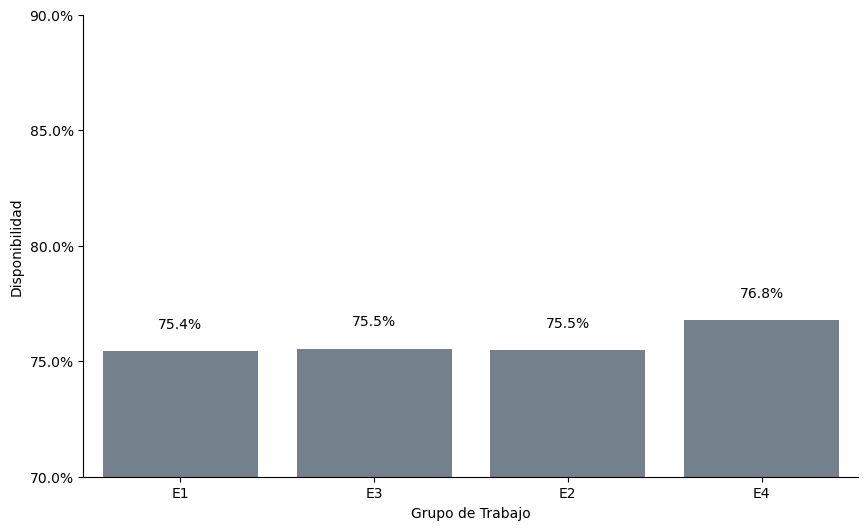

In [55]:
# graficamos las df por crew
plt.figure(figsize=(10, 6))
sns.barplot(x=group_tiempos.index, y=group_tiempos.df, color='slategray')

# mejoramos la visualización
sns.despine()
plt.ylim(0.7, 0.9)
plt.yticks(np.arange(0.7, 0.9, 0.05))
plt.xlabel('Grupo de Trabajo')
plt.ylabel('Disponibilidad')

# damos formato de porcentaje al eje y
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))

# agregamos los labels
for i in range(group_tiempos.shape[0]):
    plt.text(i, group_tiempos.df.iloc[i] + 0.01, f"{group_tiempos.df.iloc[i]:.1%}", ha = 'center')


plt.show()

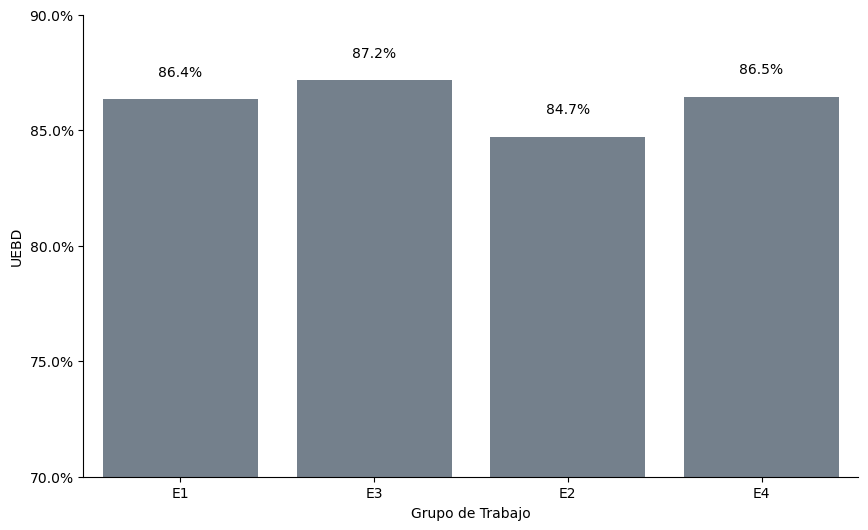

In [56]:
# graficamos las uebd por crew
plt.figure(figsize=(10, 6))
sns.barplot(x=group_tiempos.index, y=group_tiempos.uebd, color='slategray')

# mejoramos la visualización
sns.despine()
plt.ylim(0.7, 0.9)
plt.yticks(np.arange(0.7, 0.9, 0.05))
plt.xlabel('Grupo de Trabajo')
plt.ylabel('UEBD')

# damos formato de porcentaje al eje y
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))

# agregamos los labels
for i in range(group_tiempos.shape[0]):
    plt.text(i, group_tiempos.uebd.iloc[i] + 0.01, f"{group_tiempos.uebd.iloc[i]:.1%}", ha = 'center')


plt.show()

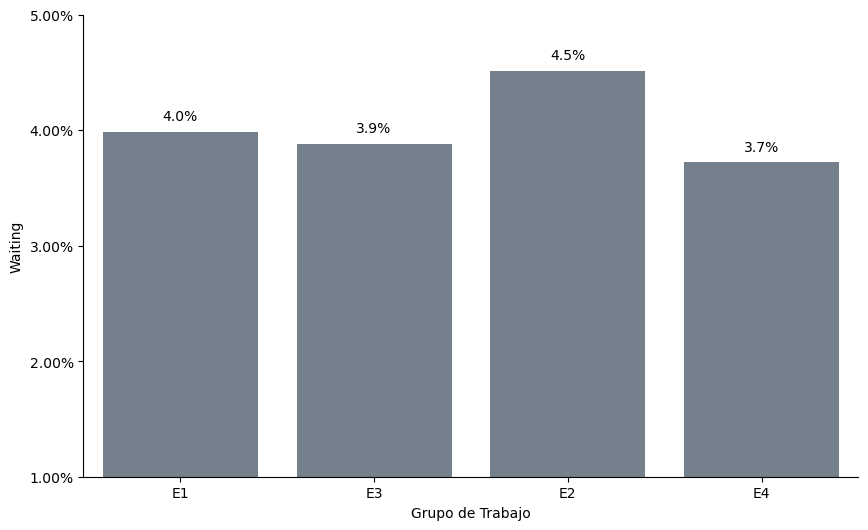

In [57]:
# graficamos las po_waiting por crew
plt.figure(figsize=(10, 6))
sns.barplot(x=group_tiempos.index, y=group_tiempos.po_waiting, color='slategray')

# mejoramos la visualización
sns.despine()
plt.ylim(0.01, 0.05)
plt.yticks(np.arange(0.01, 0.051, 0.01))
plt.xlabel('Grupo de Trabajo')
plt.ylabel('Waiting')

# damos formato de porcentaje al eje y
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))

# agregamos los labels
for i in range(group_tiempos.shape[0]):
    plt.text(i, group_tiempos.po_waiting.iloc[i] + 0.001, f"{group_tiempos.po_waiting.iloc[i]:.1%}", ha = 'center')


plt.show()

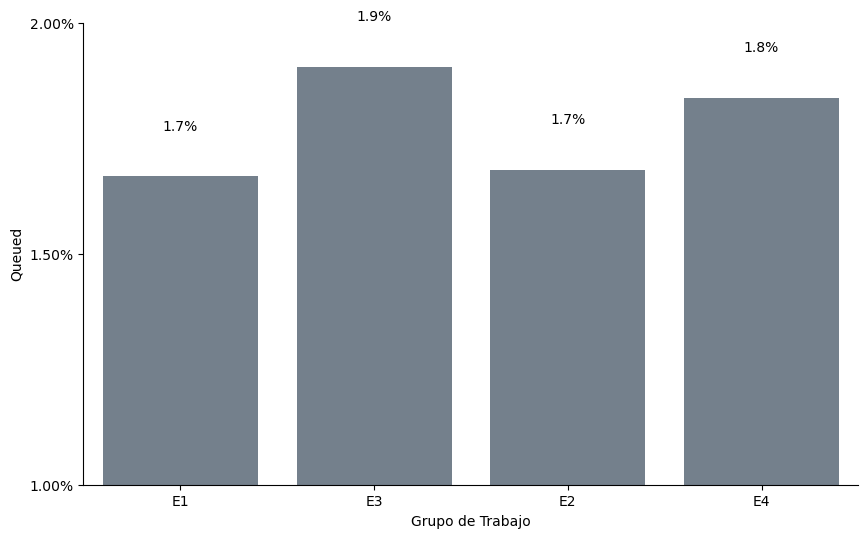

In [58]:
# graficamos las po_queued por crew
plt.figure(figsize=(10, 6))
sns.barplot(x=group_tiempos.index, y=group_tiempos.po_queued, color='slategray')

# mejoramos la visualización
sns.despine()
plt.ylim(0.01, 0.02)
plt.yticks(np.arange(0.01, 0.021, 0.005))
plt.xlabel('Grupo de Trabajo')
plt.ylabel('Queued')

# damos formato de porcentaje al eje y
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))

# agregamos los labels
for i in range(group_tiempos.shape[0]):
    plt.text(i, group_tiempos.po_queued.iloc[i] + 0.001, f"{group_tiempos.po_queued.iloc[i]:.1%}", ha = 'center')


plt.show()

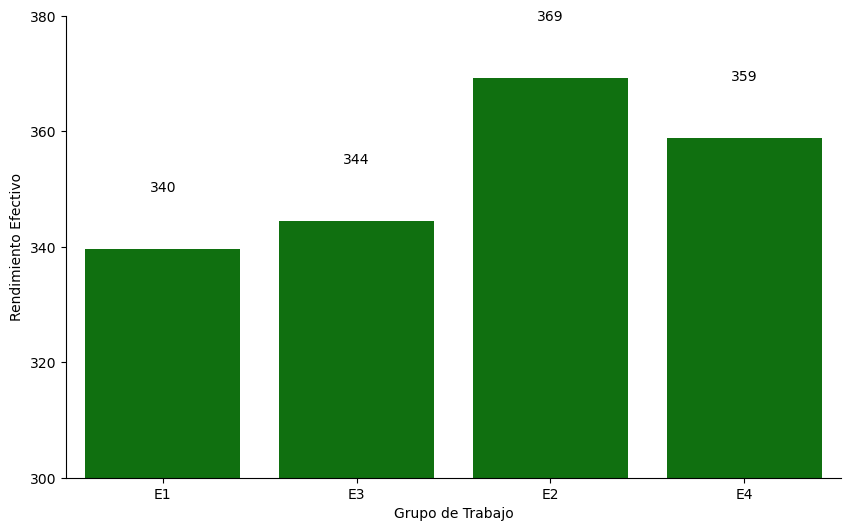

In [59]:
# graficamos los rendimientos por crew
plt.figure(figsize=(10, 6))
sns.barplot(x=group_tiempos.index, y=group_tiempos.rend, color='green')

# mejoramos la visualización
sns.despine()
plt.ylim(300, 380)
plt.yticks(np.arange(300, 381, 20))
plt.xlabel('Grupo de Trabajo')
plt.ylabel('Rendimiento Efectivo')

# damos formato de porcentaje al eje y
#plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))

# agregamos los labels
for i in range(group_tiempos.shape[0]):
    plt.text(i, group_tiempos.rend.iloc[i] + 10, f"{group_tiempos.rend.iloc[i]:.0f}", ha = 'center')


plt.show()